In [5]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)


# Combine the data into a single dataset
merged_data = pd.merge(mouse_data, clinical_data, on="Mouse ID", how = "left")

# Display the data table for preview
merged_data.tail(20)


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
1886,a262,Placebo,25,60.131862,2
1887,a262,Placebo,30,64.958092,3
1888,a262,Placebo,35,66.561963,4
1889,a262,Placebo,40,69.592732,4
1890,a262,Placebo,45,70.717621,4
1891,q787,Placebo,0,45.000000,0
1892,q787,Placebo,5,47.116616,0
1893,q787,Placebo,10,48.593862,1
1894,q787,Placebo,15,49.217732,2
1895,q787,Placebo,20,50.229934,2


## Tumor Response to Treatment

In [6]:
new_merged_data = merged_data.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]
mean_data = pd.DataFrame(new_merged_data)
mean_data = mean_data.reset_index()
mean_data.head(30)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = merged_data.groupby(["Drug","Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
standard_error_df = pd.DataFrame(standard_error)
# Preview DataFrame
standard_error_df = standard_error_df.reset_index()
standard_error_df.head(30)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
5,Capomulin,25,0.881642
6,Capomulin,30,0.934460
7,Capomulin,35,1.052241
8,Capomulin,40,1.223608
9,Capomulin,45,1.223977


In [8]:
#take both data frames pivot them where index is timepoint just rotate it
standard_error_pivoted_df= standard_error_df.pivot(index = "Timepoint",columns = "Drug")["Tumor Volume (mm3)"]

standard_error_pivoted_df

mean_data = mean_data.pivot(index = "Timepoint",columns = "Drug")["Tumor Volume (mm3)"]

mean_data 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


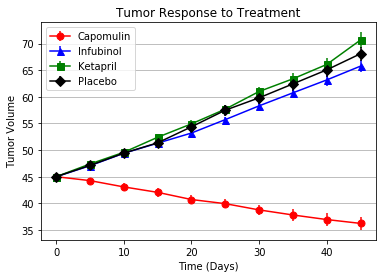

<Figure size 432x288 with 0 Axes>

In [48]:
# Generate the Plot (with Error Bars)
# Generate the Plot (with Error Bars)
plt.errorbar(mean_data.index, mean_data['Capomulin'],
             yerr= standard_error_pivoted_df['Capomulin'], color = 'r', marker = 'o', markersize = 7)
plt.errorbar(mean_data.index, mean_data['Infubinol'],
             yerr= standard_error_pivoted_df['Infubinol'], color = 'b', marker = "^", markersize = 7)

plt.errorbar(mean_data.index, mean_data['Ketapril'],
             yerr= standard_error_pivoted_df['Ketapril'], color = 'g', marker = "s", markersize = 7)
plt.errorbar(mean_data.index, mean_data['Placebo'],
             yerr= standard_error_pivoted_df['Placebo'], color = 'black', marker = "D", markersize = 7)


plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume")
plt.legend([ 'Capomulin','Infubinol','Ketapril','Placebo' ])
plt.grid(axis='y')
plt.show()

# Save the Figure
plt.savefig("TumorResponsePlot.png")
# Save the Figure



In [49]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [50]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
new_merged_data = merged_data.groupby(["Drug","Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
mean_met_data = pd.DataFrame(new_merged_data)
# Preview DataFrame
mean_met_data = mean_met_data.reset_index()
mean_met_data

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174
...,...,...,...
95,Zoniferol,25,1.687500
96,Zoniferol,30,1.933333
97,Zoniferol,35,2.285714
98,Zoniferol,40,2.785714


In [42]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
new_merged_data = merged_data.groupby(["Drug","Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
mean_s_data = pd.DataFrame(new_merged_data)
# Preview DataFrame
mean_s_data = mean_s_data.reset_index()
mean_s_data

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621
...,...,...,...
95,Zoniferol,25,0.236621
96,Zoniferol,30,0.248168
97,Zoniferol,35,0.285714
98,Zoniferol,40,0.299791


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview that Reformatting worked


In [43]:
mean_s_data_pivoted= mean_s_data.pivot(index = "Timepoint",columns = "Drug")["Metastatic Sites"]

mean_s_data_pivoted

mean_met_data_pivoted = mean_met_data.pivot(index = "Timepoint",columns = "Drug")["Metastatic Sites"]

mean_met_data_pivoted 

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


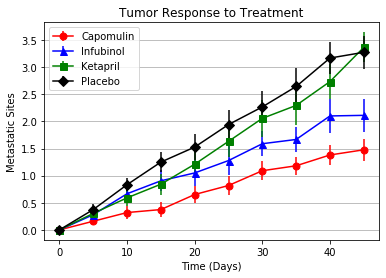

<Figure size 432x288 with 0 Axes>

In [51]:
# Generate the Plot (with Error Bars)
plt.errorbar(mean_met_data_pivoted.index, mean_met_data_pivoted['Capomulin'],
             yerr= mean_s_data_pivoted['Capomulin'], color = 'r', marker = 'o', markersize = 7)
plt.errorbar(mean_met_data_pivoted.index, mean_met_data_pivoted['Infubinol'],
             yerr= mean_s_data_pivoted['Infubinol'], color = 'b', marker = "^", markersize = 7)

plt.errorbar(mean_met_data_pivoted.index, mean_met_data_pivoted['Ketapril'],
             yerr= mean_s_data_pivoted['Ketapril'], color = 'g', marker = "s", markersize = 7)
plt.errorbar(mean_met_data_pivoted.index, mean_met_data_pivoted['Placebo'],
             yerr= mean_s_data_pivoted['Placebo'], color = 'black', marker = "D", markersize = 7)


plt.title("Metastatic Sites Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.legend([ 'Capomulin','Infubinol','Ketapril','Placebo' ])
plt.grid(axis='y')
plt.show()

# Save the Figure
plt.savefig("MetaResponsePlot.png")
# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [49]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
new_merged_data5 = merged_data.groupby(["Drug","Timepoint"]).count()["Metastatic Sites"]


# Convert to DataFrame
count_df = pd.DataFrame(new_merged_data5)
count_df = count_df.reset_index()

# Preview DataFrame
count_df

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [50]:
# Minor Data Munging to Re-Format the Data Frames
count_df = count_df.pivot(index = "Timepoint",columns = "Drug")["Metastatic Sites"]
# Preview the Data Frame
count_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


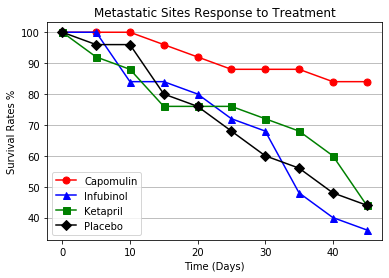

<Figure size 432x288 with 0 Axes>

In [59]:
# Generate the Plot (Accounting for percentages)
plt.plot(count_df.index, count_df['Capomulin']/25*100, color = 'r', marker = 'o', markersize = 7)
plt.plot(count_df.index, count_df['Infubinol']/25*100, color = 'b', marker = "^", markersize = 7)

plt.plot(count_df.index, count_df['Ketapril']/25*100, color = 'g', marker = "s", markersize = 7)
plt.plot(count_df.index, count_df['Placebo']/25*100, color = 'black', marker = "D", markersize = 7)


plt.title("Metastatic Sites Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rates %")
plt.legend([ 'Capomulin','Infubinol','Ketapril','Placebo' ])
plt.grid(axis='y')
plt.show()


# Save the Figure
plt.savefig("SurvivalRate.png")
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [42]:
# Calculate the percent changes for each drug get the deviations of change find those deviations calcualate percentage 
#time frame going up subtract 5 from 0 10 from 5: loc
# Calculate the percent changes for all drugs
Capomulin_percent=(mean_data["Capomulin"].iloc[9]-mean_data["Capomulin"].iloc[0])/mean_data["Capomulin"].iloc[0]*100

Infubinol_percent=(mean_data["Infubinol"].iloc[9]-mean_data["Infubinol"].iloc[0])/mean_data["Infubinol"].iloc[0]*100

Ketapril_percent=(mean_data["Ketapril"].iloc[9]-mean_data["Ketapril"].iloc[0])/mean_data["Ketapril"].iloc[0]*100

Placebo_percent=(mean_data["Placebo"].iloc[9]-mean_data["Placebo"].iloc[0])/mean_data["Placebo"].iloc[0]*100
Propriva_percent=(mean_data["Propriva"].iloc[9]-mean_data["Propriva"].iloc[0])/mean_data["Propriva"].iloc[0]*100
Naftisol_percent=(mean_data["Naftisol"].iloc[9]-mean_data["Naftisol"].iloc[0])/mean_data["Naftisol"].iloc[0]*100
Ramicane_percent=(mean_data["Ramicane"].iloc[9]-mean_data["Ramicane"].iloc[0])/mean_data["Ramicane"].iloc[0]*100
Stelasyn_percent=(mean_data["Stelasyn"].iloc[9]-mean_data["Stelasyn"].iloc[0])/mean_data["Stelasyn"].iloc[0]*100
Zoniferol_percent=(mean_data["Zoniferol"].iloc[9]-mean_data["Zoniferol"].iloc[0])/mean_data["Zoniferol"].iloc[0]*100
Ceftamin_percent=(mean_data["Ceftamin"].iloc[9]-mean_data["Ceftamin"].iloc[0])/mean_data["Ceftamin"].iloc[0]*100








#Create a toouple with all of the values 
percent_tuple = {'Capomulin': Capomulin_percent, 'Infubinol': Infubinol_percent, 'Ketapril': Ketapril_percent, 'Placebo': Placebo_percent,
                "Ramicane":Ramicane_percent,"Propriva":Propriva_percent,"Naftisol": Naftisol_percent, "Stelasyn": Stelasyn_percent,
                "Zoniferol": Zoniferol_percent, "Ceftamin": Ceftamin_percent}
percentchange_tumorvolume = pd.Series(percent_tuple)
percentchange_tumorvolume
#index values 
tumor_change = percentchange_tumorvolume.values
#index drugs 
testdrugs=percentchange_tumorvolume.keys()
testdrugs

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo', 'Ramicane', 'Propriva',
       'Naftisol', 'Stelasyn', 'Zoniferol', 'Ceftamin'],
      dtype='object')

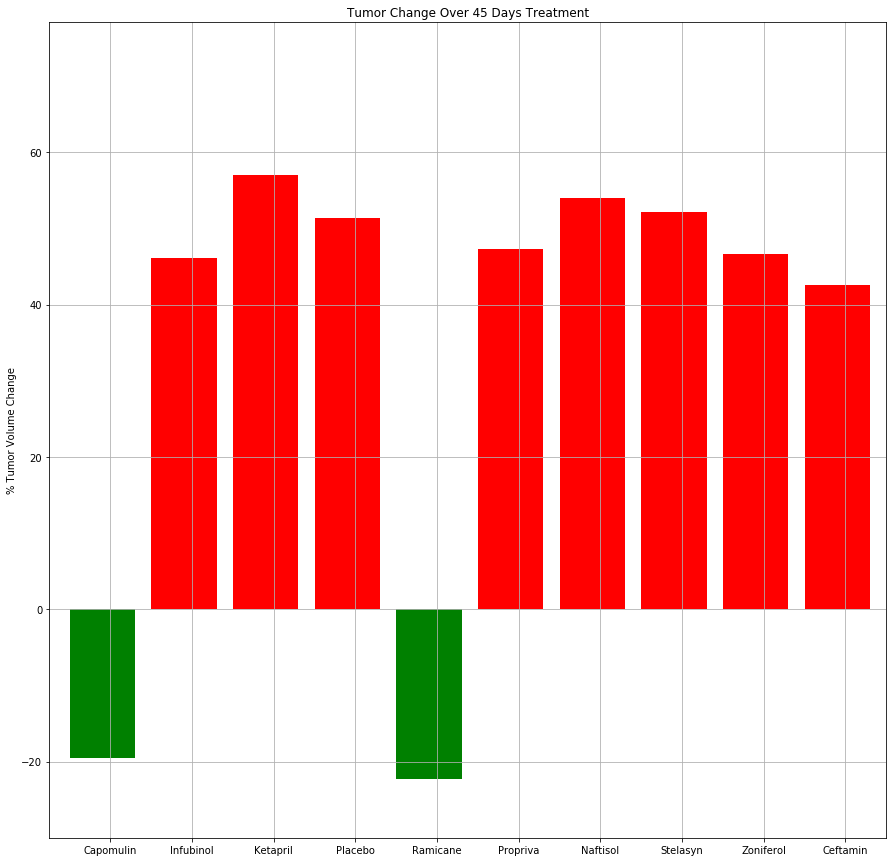

In [47]:

fig, summary_bar = plt.subplots(figsize=(15,15))
x_axis = np.arange(0, len(testdrugs))
# Splice the data between passing and failing drugs
# Orient widths. Add labels, tick marks, etc. 

tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.5)
plt.xticks(tick_locations, testdrugs)
colors = []
for value in percentchange_tumorvolume:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')
        
 #Plot       
percent_change = summary_bar.bar(x_axis, percentchange_tumorvolume, color=colors, align="edge")
#set labels 
plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.25, len(testdrugs))
plt.ylim(-30, max(percentchange_tumorvolume) + 20)
plt.grid()

summary_bar.figure.savefig("Tumor_Change")

# Show the Figure
fig.show()
plt.show()

In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs subplot.. figure,ax


# Orient widths. Add labels, tick marks, etc. limits. tick lables 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure create funciton to lable everything have output be percentages. 
my_name.savefig("what i wana call it.png")

# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)